In [1]:
import json
# only load trianing data for now 
train = json.load(open('../../VQA/questions/v2_OpenEnded_mscoco_train2014_questions.json', 'r'))

In [2]:
train['questions'][0]

{u'image_id': 458752,
 u'question': u'What is this photo taken looking through?',
 u'question_id': 458752000}

In [7]:
from IPython.display import Image
relative_image_filepath = "../../VQA/images/train2014/COCO_train2014_"
i = 99
image_path = relative_image_filepath + str(train['questions'][i]['image_id']) + ".jpg"
print(image_path)
subtype = 'train2014'
imdir='%s/COCO_%s_%012d.jpg'
image_path1 = '../../VQA/images/' + imdir%(subtype, subtype, train['questions'][i]['image_id'])
image_path2 = '../../VQA/images/train2014/COCO_train2014_000000000025.jpg'
Image(filename = image_path1)
print(train['questions'][i]['question_id'])

../../VQA/images/train2014/COCO_train2014_25.jpg
25017


In [5]:
# I want all questions for 2000 images in the training dataset 
itoa = {}
for q in train['questions']: 
    imgid = q['image_id']
    #print(type(imgid))
    if imgid in itoa:
        itoa[imgid].append(q['question'])
    elif (len(itoa) < 2000):
        itoa[imgid] = []
        itoa[imgid].append(q['question'])
print(len(itoa))

2000


In [6]:
itoa[393230]

[u'What is this person doing?',
 u'How many people are in this image?',
 u'Is there a shadow of a tree in the foreground?',
 u'What is the man doing?',
 u'What color is the sky?',
 u'What is the person wearing?',
 u'Did someone forget his luggage in the snow?',
 u'What color is his coat?',
 u'Is it daytime?',
 u'What is she holding?',
 u'Is the person wearing a hat?']

In [7]:
subtype = 'train2014'
imdir='%s/COCO_%s_%012d.jpg'
out = []
for key in itoa:
    jimg = {}
    jimg['file_path'] = imdir%(subtype, subtype, key)
    jimg['id'] = key
    jimg['captions'] = itoa[key]
    out.append(jimg)
json.dump(out, open('coco_raw.json', 'w'))

In [8]:
out[0]

{'captions': [u'What is this photo taken looking through?',
  u'What position is this man playing?',
  u'What color is the players shirt?',
  u'Is this man a professional baseball player?'],
 'file_path': 'train2014/COCO_train2014_000000458752.jpg',
 'id': 458752}

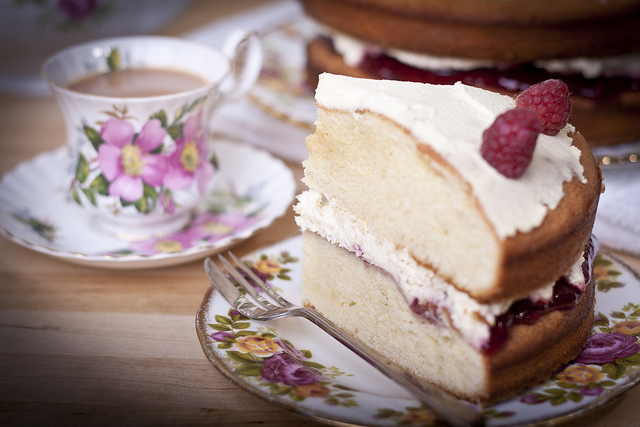

In [36]:
image_path1 = '../../VQA/images/' + imdir%(subtype, subtype, 133063)
Image(filename = image_path1)